In [1]:
import matplotlib.pyplot as plt
import numpy as np

import ssbc

In [2]:
p_class1 = 0.10
beta_params_class0 = (2, 5)
beta_params_class1 = (8, 2)

alpha_0 = 0.10
delta_0 = 0.10
alpha_1 = 0.10
delta_1 = 0.10

In [3]:
sampler = ssbc.simulation.BinaryClassifierSimulator(
    p_class1=p_class1, beta_params_class0=beta_params_class0, beta_params_class1=beta_params_class1
)

In [4]:
labels, probs = sampler.generate(10000)
class_data = ssbc.split_by_class(labels=labels, probs=probs)

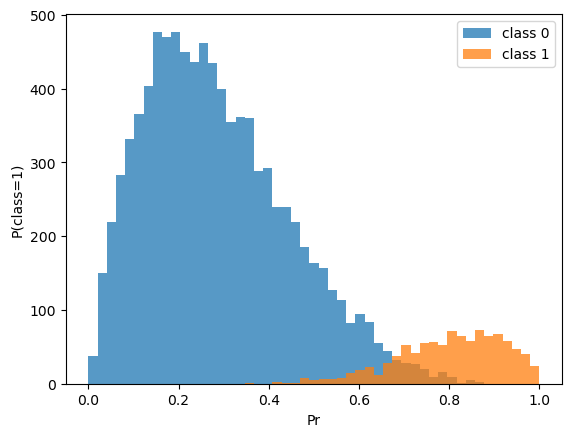

In [5]:
plt.hist(class_data[0]["probs"][:, 1], bins=np.linspace(0, 1, 50), alpha=0.75)
plt.hist(class_data[1]["probs"][:, 1], bins=np.linspace(0, 1, 50), alpha=0.75)
plt.legend(["class 0", "class 1"])
plt.ylabel("P(class=1)")
plt.xlabel("Pr")
plt.show()

In [6]:
cal_result, pred_stats = ssbc.mondrian_conformal_calibrate(
    alpha_target={0: alpha_0, 1: alpha_1}, delta={0: delta_0, 1: delta_1}, class_data=class_data
)

op_bounds = ssbc.compute_mondrian_operational_bounds(
    calibration_result=cal_result, labels=labels, probs=probs, delta=0.10, n_jobs=-1
)

marginal_bounds = ssbc.compute_marginal_operational_bounds(
    labels=labels, probs=probs, alpha_target=0.10, delta_coverage=0.05, delta=0.05, n_jobs=-1
)


summary = ssbc.report_prediction_stats(pred_stats, cal_result, op_bounds, marginal_bounds)

MONDRIAN CONFORMAL PREDICTION REPORT

CLASS 0 (Conditioned on True Label = 0)
  Calibration size: n = 9005
  Target miscoverage: α = 0.100
  SSBC-corrected α:   α' = 0.0959
  PAC risk:           δ = 0.100
  Conformal threshold: 0.5170

  📊 Statistics from Calibration Data (n=9005):
     [Basic CP CIs without PAC guarantee - evaluated on calibration data]
    Abstentions:   579 / 9005 =  6.43%  95% CI: [0.059, 0.070]
    Singletons:   8426 / 9005 = 93.57%  95% CI: [0.930, 0.941]
      Correct:    8142 / 9005 = 90.42%  95% CI: [0.898, 0.910]
      Incorrect:   284 / 9005 =  3.15%  95% CI: [0.028, 0.035]
    Error | singleton:  284 / 8426 =  3.37%  95% CI: [0.030, 0.038]
    Doublets:        0 / 9005 =  0.00%  95% CI: [0.000, 0.000]

  📐 PAC Singleton Error Bound (δ=0.100):
     ρ = 14.553, κ = 1.000
     α'_bound:    0.0382
     α'_observed: 0.0337 ✓

  ✅ RIGOROUS Operational Bounds (LOO-CV)
     PAC confidence: 95.0% (probability bounds hold)
     CI width: 95.0% (Clopper-Pearson interv

In [7]:
labels, probs = sampler.generate(100)
class_data = ssbc.split_by_class(labels=labels, probs=probs)

In [8]:
cal_result, pred_stats = ssbc.mondrian_conformal_calibrate(
    alpha_target={0: alpha_0, 1: alpha_1}, delta={0: delta_0, 1: delta_1}, class_data=class_data
)

op_bounds = ssbc.compute_mondrian_operational_bounds(
    calibration_result=cal_result, labels=labels, probs=probs, delta=0.10, n_jobs=-1
)

marginal_bounds = ssbc.compute_marginal_operational_bounds(
    labels=labels, probs=probs, alpha_target=0.10, delta_coverage=0.05, delta=0.05, n_jobs=-1
)


summary = ssbc.report_prediction_stats(pred_stats, cal_result, op_bounds, marginal_bounds)

MONDRIAN CONFORMAL PREDICTION REPORT

CLASS 0 (Conditioned on True Label = 0)
  Calibration size: n = 95
  Target miscoverage: α = 0.100
  SSBC-corrected α:   α' = 0.0625
  PAC risk:           δ = 0.100
  Conformal threshold: 0.5959

  📊 Statistics from Calibration Data (n=95):
     [Basic CP CIs without PAC guarantee - evaluated on calibration data]
    Abstentions:     5 /   95 =  5.26%  95% CI: [0.017, 0.119]
    Singletons:     90 /   95 = 94.74%  95% CI: [0.881, 0.983]
      Correct:      90 /   95 = 94.74%  95% CI: [0.881, 0.983]
      Incorrect:     0 /   95 =  0.00%  95% CI: [0.000, 0.038]
    Error | singleton:    0 /   90 =  0.00%  95% CI: [0.000, 0.040]
    Doublets:        0 /   95 =  0.00%  95% CI: [0.000, 0.038]

  📐 PAC Singleton Error Bound (δ=0.100):
     ρ = 18.000, κ = 1.000
     α'_bound:    0.0500
     α'_observed: 0.0000 ✓

  ✅ RIGOROUS Operational Bounds (LOO-CV)
     PAC confidence: 95.0% (probability bounds hold)
     CI width: 95.0% (Clopper-Pearson interval w